In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from rentorbuy import RentOrBuy
from asset import annual_to_monthly_stdev, annual_to_monthly_return

### Insert variables
- `monthly_rent`: the monthly rent of an apartment similar to the one you want to buy.
- `house_price`: the price which you expect to pay for the house, i.e. listed price + overbid.
- `additional_monthly_costs`: any additional costs of ownership, e.g. condo fees.
- `additional_purchase_costs`: They include legal fees, title insurance, home inspection, home appraisal, etc.
- `down_payment`: the downpayment you expect to put on your mortgage.
- `mortgage_apr`: the interest on your mortgage in percentage, e.g. $5\%$ (including fees). The interest is assumed to be fixed for the whole loan term.
- `mortgage_amortization_years`: the years that will take you to repay the mortgage.
- `mortgage_additional_payments`: the monthly additional amount that you intend to use to repay your mortgage.
- `maintenance_cost`: the yearly maintenance costs as a percentage of the `house_price`.
- `monthly_property_tax_rate`: the monthly property tax on your house (annual property tax divided by 12).
- `annual_inflation`: the expected avg. annual rate of inflation over the term of the loan.
- `return_ret`: the expected avg. annual return of real estate investements in the area where you are planning to buy over the `mortgage_term`.

- `housing_asset_dict`: distribution of expected monthly returns on real estate (e.g. based on historical data).
- `investment_asset_dict`: distribution of expected monthly returns on alternative investment to real estate (e.g. low cost index fund).

### TODO
- Take into account tax discount on mortgage interest and purchase costs
- Take into account costs of selling the house
- Improve visualization

In [62]:
mgt = RentOrBuy(
    monthly_rent=2000,
    house_price=565000,
    down_payment=0,
    mortgage_amortization_years=30,
    mortgage_apr=0.045,
    additional_purchase_costs=20000,
    additional_monthly_costs=300,
    mortgage_additional_payments=0,
    annual_inflation=0.02,
    monthly_property_tax_rate=0.000042,
    maintenance_cost=0.01,
    housing_asset_dict={
        "dist": np.random.normal, 
        "dist_args": {
            "loc": annual_to_monthly_return(0.0735), 
            "scale":  annual_to_monthly_stdev(0.0860)}
    },
    investment_asset_dict={
        "dist": np.random.normal, 
        "dist_args": {
            "loc": annual_to_monthly_return(0.0764), 
            "scale":  annual_to_monthly_stdev(0.192)}
    },
)

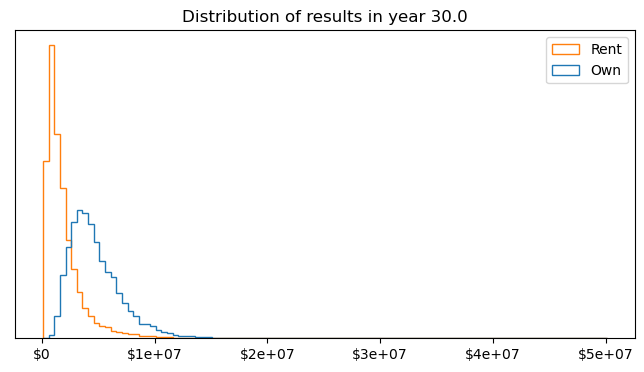

In [66]:
mgt.histogram(period=360)

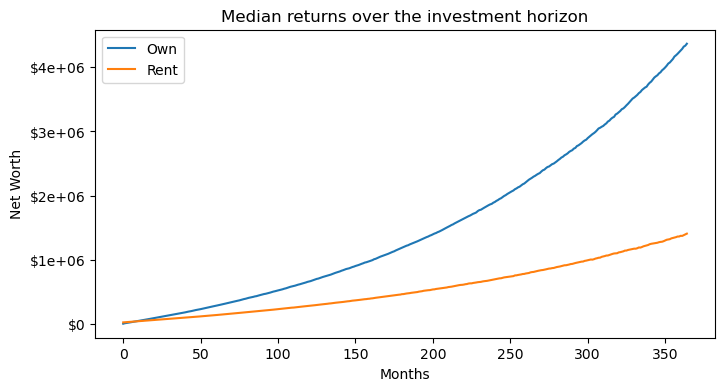

In [67]:
mgt.median_returns_plot()

In [53]:
mgt.mortgage_df

,Begin_balance,Payment,Principal,Interest,Additional_payment,End_balance,total_payment
Date,,,,,,,
2022-11-01,565000.00,2832.56,733.40,2099.16,0,564266.60,2832.56
2022-12-01,564266.60,2832.56,736.13,2096.43,0,563530.47,2832.56
2023-01-01,563530.47,2832.56,738.86,2093.70,0,562791.61,2832.56
2023-02-01,562791.61,2832.56,741.61,2090.95,0,562050.00,2832.56
2023-03-01,562050.00,2832.56,744.36,2088.20,0,561305.64,2832.56
...,...,...,...,...,...,...,...
2052-11-01,12253.19,2832.56,2787.04,45.52,0,9466.15,2832.56
2052-12-01,9466.15,2832.56,2797.39,35.17,0,6668.76,2832.56
2053-01-01,6668.76,2832.56,2807.78,24.78,0,3860.98,2832.56
